# **Sustainable Tourism: The impact of tourism onto the environment**

<h4 align="left"><span style="font-weight:650; font-size:160%">Description:</span></h4>

&nbsp;&nbsp;&nbsp;&nbsp;The tourism in Vietnam are increasing yearly after the Covid-19. In 2023, the Misnistry of Culture, Sports and Tourism (MOCST) have submit a report about Vietnamese Tourism. Mentioned in the report, there are over 12.6 million of tourist arrival in Vietnam, contribute over 62% for the GDP of Vietnam. On the other hand, base on the data environment data from the Ministry of Natural Resources and Environment (MONRE), in 2023, Vietnam is top 8 out of 10 most ocean plastic waste-producing country in the world. The following project is to analyze, calculate and predict about the variation on Vietnam's tourism and also about waste pollution of Vietnam's coastal province.

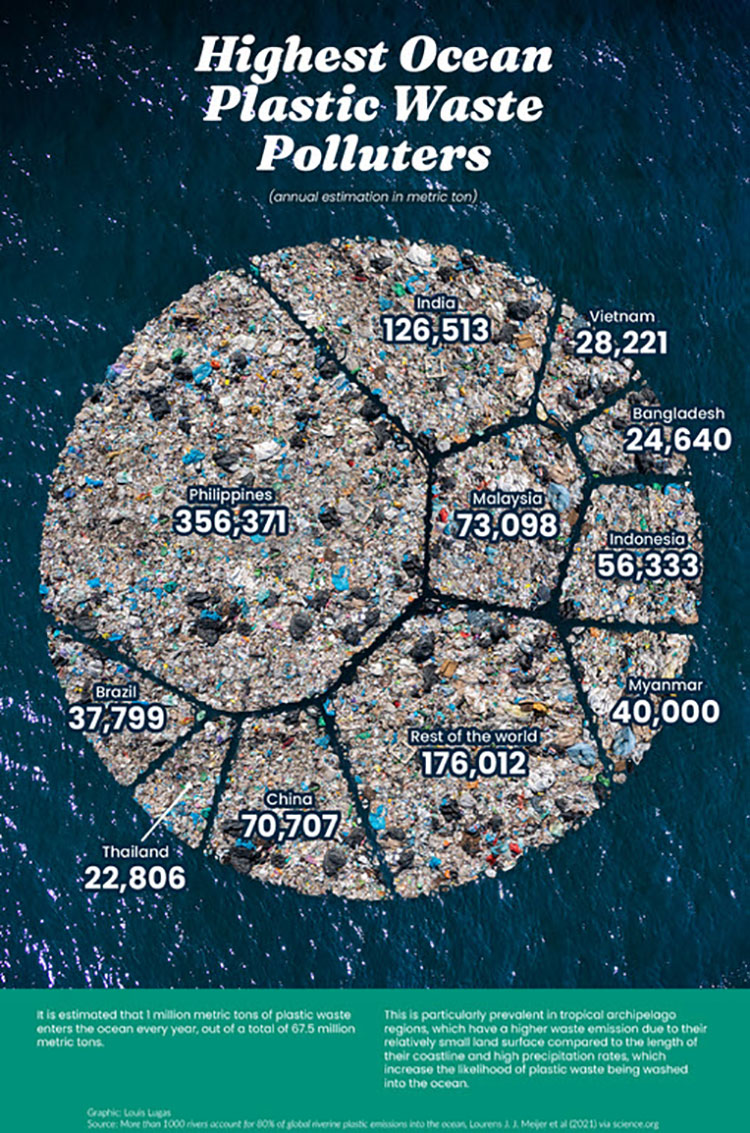

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left">

<h2><span style="text-align:center; font-weight:bolder; font-size:130%">Table of Contents:</span></h2>

 *  **[1 | Python Libraries](#setup)**
 *  **[2 | Data Handling](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data Information](#info)
 *  **[3 | Data Preprocessning](#preprocessing)**
    -  [3.1 | Visualization and Plot Analysis](#plot)
    -  [3.2 | Map Visualization](#folium)
    -  [3.3 | Normalization](#norm)
 *  **[Step 4 | Data Analytical & Modeling](#da-ml)**
    -  [4.1 | Initialization](#init)
    -  [4.2 | Data Analytical](#data-ana)
         * [4.2.1 | Information Gain](#ig)
         * [4.2.2 | Cor-relationship](#corr)
         * [4.2.3 | Linear Regression](#lin-reg)
         * [4.2.4 | Clustering K-means](#kmeans)
    -  [4.3 | Modeling](#ml)
         * [4.3.1 | Season and Quarter Prediction](#ss_quarter)
            * [4.3.1.1 | Logistic regression](#log-reg)
            * [4.3.1.2 | K-Neighbors Classifier](#knn)
            * [4.3.1.3 | Decision Tree Classifier](#tree_ss)
            * [4.3.1.4 | SVC](#svc)
            * [4.3.1.5 | Clustering Model Comparision](#cluster-result)
         * [4.3.2 | Environment and Visitor](#env_visit)
            * [4.3.2.1 | Decision Tree](#tree_env)
            * [4.3.2.2 | Random Forest](#rand_for)
 *  **[Reference](#reference)**
 *  **[Author](#author)**

<a id="setup"></a>
<h2><b><p style="font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">1. Python Libraries</p></b></h2>

In [4]:
import configparser
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
import folium
import tensorflow as tf
from scipy import stats

# Import folium plugins
from folium.plugins import MarkerCluster

# Import sklearn plugins
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<a id="setup"></a>
<h2><b><p style="font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">2. Data Handling</p></b></h2>

<a id="load_data"></a>
<h3><b><span style="color:#005f26">🔶 Step 2.1 | </span><span style="color:#ff6200">Data Collection</span></b></h3>

In [8]:
# Load config file
config = configparser.RawConfigParser()
config.read('configfile.properties')

# Connecting to database
db_name = config.get('DatabaseSection','database.db_name')
db_host = config.get('DatabaseSection','database.db_host')
db_username = config.get('DatabaseSection','database.db_username')
db_password = config.get('DatabaseSection','database.db_password')

try:
    conn = pymysql.connect(host = db_host,
                           port = int(3306),
                           user = db_username,
                           password = db_password,
                           db = db_name)
except e:
    print (e)
if conn:
    print ("connection successful")
else:
        print ("error")

connection successful


In [3]:
# Calculating number of citizen (noc) by thousand
noc = pd.read_sql_query("select * from avg_citizen", conn)
noc_by_thousand = pd.DataFrame([])
noc_by_thousand['year'] = noc['year']
noc_by_thousand['Kien_Giang'] = noc['Kien_Giang'] / 1000
noc_by_thousand['Hai_Phong'] = noc['Hai_Phong'] / 1000
noc_by_thousand['Quang_Ninh'] = noc['Quang_Ninh'] / 1000
noc_by_thousand['Da_Nang'] = noc['Da_Nang'] / 1000
noc_by_thousand['Khanh_Hoa'] = noc['Khanh_Hoa'] / 1000
noc_by_thousand['Vung_Tau'] = noc['Vung_Tau'] / 1000
noc_by_thousand

C:\Users\minhv\AppData\Local\Temp\ipykernel_16960\43297966.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  noc = pd.read_sql_query("select * from avg_citizen", conn)


year  Kien_Giang  Hai_Phong  Quang_Ninh  Da_Nang  Khanh_Hoa  Vung_Tau
0  2015      1705.4     1969.5      1241.6   1056.3     1198.4    1104.3
1  2016      1708.7     1985.3      1261.2   1080.3     1207.2    1117.6
2  2017      1712.9     2001.4      1285.2   1097.8     1216.3    1127.2
3  2018      1718.1     2016.4      1303.9   1114.4     1224.5    1138.3
4  2019      1723.7     2033.3      1324.8   1141.1     1232.8    1152.2
5  2020      1728.9     2053.5      1337.6   1169.5     1240.4    1167.9
6  2021      1752.3     2072.4      1350.9   1195.5     1248.1    1176.1
7  2022      1751.8     2088.0      1362.9   1220.2     1254.0    1178.7
8  2023      1755.3     2105.0      1381.2   1245.2     1260.6    1187.5

In [4]:
# create a string name location
locations = ["Kien_Giang","Hai_Phong","Quang_Ninh","Da_Nang","Khanh_Hoa","Vung_Tau"]

In [5]:
# Collected data about the number of collected waste
cw = pd.read_sql_query("select * from collected_waste", conn)
cw

C:\Users\minhv\AppData\Local\Temp\ipykernel_16960\3206803233.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cw = pd.read_sql_query("select * from collected_waste", conn)


year  Kien_Giang  Hai_Phong  Quang_Ninh  Da_Nang  Khanh_Hoa  Vung_Tau
0  2015         396       1408         737      730        475       602
1  2016         433       1086         815      751        475       409
2  2017         621       1086        1054      751        475       676
3  2018         624       1100        1054      959        626       620
4  2019         624       1776        1003     1050        626       900

In [6]:
# Collected data about hotel review
review_data = pd.read_sql("select hi.hotelName, hi.hotelLocation, hi.hotelRank, rd.* from hotelInfo hi left join review_data rd on rd.hotelID = hi.hotelID", conn)
review_data.head()

C:\Users\minhv\AppData\Local\Temp\ipykernel_16960\66729643.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  review_data = pd.read_sql("select hi.hotelName, hi.hotelLocation, hi.hotelRank, rd.* from hotelInfo hi left join review_data rd on rd.hotelID = hi.hotelID", conn)


hotelName hotelLocation  hotelRank  hotelID  rating  \
0  A La Carte Da Nang Beach       Da Nang          4      1.0     6.0   
1  A La Carte Da Nang Beach       Da Nang          4      1.0     9.0   
2  A La Carte Da Nang Beach       Da Nang          4      1.0     9.0   
3  A La Carte Da Nang Beach       Da Nang          4      1.0     9.0   
4  A La Carte Da Nang Beach       Da Nang          4      1.0     7.0   

   reviewDate  reviewDay  reviewMonth  reviewYear  
0  2022-01-17       17.0          1.0      2022.0  
1  2022-04-20       20.0          4.0      2022.0  
2  2022-05-04        4.0          5.0      2022.0  
3  2022-05-05        5.0          5.0      2022.0  
4  2022-05-07        7.0          5.0      2022.0

In [7]:
vt = review_data[review_data['hotelLocation']=='Vung Tau']
dn = review_data[review_data['hotelLocation']=='Da Nang']
qn = review_data[review_data['hotelLocation']=='Quang Ninh']
hp = review_data[review_data['hotelLocation']=='Hai Phong']
kh = review_data[review_data['hotelLocation']=='Khanh Hoa']
kg = review_data[review_data['hotelLocation']=='Kien Giang']

In [8]:
# Collect data about hotel coordinate
hotel_coordinate = pd.read_sql('select hi.*, hll.hotelLat, hll.hotelLong from hotelInfo hi join hotelLatLong hll on hi.hotelID = hll.hotelID', conn)
hotel_coordinate

C:\Users\minhv\AppData\Local\Temp\ipykernel_16960\4102120972.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hotel_coordinate = pd.read_sql('select hi.*, hll.hotelLat, hll.hotelLong from hotelInfo hi join hotelLatLong hll on hi.hotelID = hll.hotelID', conn)


hotelID                            hotelName hotelLocation  hotelRank  \
0          1             A La Carte Da Nang Beach       Da Nang          4   
1          2         A La Carte Ha Long Bay Hotel    Quang Ninh          5   
2          3     A La Carte Ha Long Bay Residence    Quang Ninh          5   
3          4                 Adela Boutique Hotel       Da Nang          4   
4          5          Alana Nha Trang Beach Hotel     Khanh Hoa          4   
..       ...                                  ...           ...        ...   
291      292            Yarra Ocean Suites Danang       Da Nang          4   
292      293  Yasaka Saigon Nha Trang Hotel & Spa     Khanh Hoa          4   
293      294                    Yes Hotel Da Nang       Da Nang          4   
294      295                Yoko Onsen Quang Hanh    Quang Ninh          4   
295      296       Zenia Boutique Hotel Nha Trang     Khanh Hoa          4   

     hotelLat  hotelLong  
0     16.0699    108.245  
1     20.9536    107.003  
2     20.9531    107.003  
3     16.0534    108.244  
4     12.2339    109.197  
..        ...        ...  
291   16.0490    108.249  
292   12.2498    109.196  
293   16.0743    108.242  
294   20.9823    107.203  
295   12.2438    109.192  

[296 rows x 6 columns]

<a id="info"></a>
<h3><b><span style="color:#005f26">🔶 Step 2.2 | </span><span style="color:#ff6200">Data Information</span></b></h3>

There are 3 main dataframe will be using inside the project:
- `review_data`: contain the review data that are collected from Traveloka
- `noc_by_thousand`: contain the number of citizen that have been published by MOCST
- `cw` (collected wasted): contain the data of solid waste that have been published by MONRE 

In [9]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10259 entries, 0 to 10258
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hotelName      10259 non-null  object 
 1   hotelLocation  10259 non-null  object 
 2   hotelRank      10259 non-null  int64  
 3   hotelID        10258 non-null  float64
 4   rating         10258 non-null  float64
 5   reviewDate     10258 non-null  object 
 6   reviewDay      10258 non-null  float64
 7   reviewMonth    10258 non-null  float64
 8   reviewYear     10258 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 721.5+ KB


In [10]:
noc_by_thousand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        9 non-null      int64  
 1   Kien_Giang  9 non-null      float64
 2   Hai_Phong   9 non-null      float64
 3   Quang_Ninh  9 non-null      float64
 4   Da_Nang     9 non-null      float64
 5   Khanh_Hoa   9 non-null      float64
 6   Vung_Tau    9 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 636.0 bytes


In [11]:
cw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        5 non-null      int64
 1   Kien_Giang  5 non-null      int64
 2   Hai_Phong   5 non-null      int64
 3   Quang_Ninh  5 non-null      int64
 4   Da_Nang     5 non-null      int64
 5   Khanh_Hoa   5 non-null      int64
 6   Vung_Tau    5 non-null      int64
dtypes: int64(7)
memory usage: 412.0 bytes


<a id="preprocessing"></a>
<h2><b><p style="font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">3. Data Preprocessing</p></b></h2>

<a id="missing"></a>
<h3><b><span style="color:#005f26">🔶 Step 3.1 | </span><span style="color:#ff6200">Missing Value Handling</span></b></h3>

In [12]:
review_data.isna().sum()

hotelName        0
hotelLocation    0
hotelRank        0
hotelID          1
rating           1
reviewDate       1
reviewDay        1
reviewMonth      1
reviewYear       1
dtype: int64

There is only one line of each is null value, so we will remove them.

In [13]:
review_data.dropna(how='any', inplace=True)

In [14]:
# classify by quarter
q1 = [1,2,3]
q2 = [4,5,6]
q3 = [7,8,9]
q4 = [10,11,12]

quarters = []
for i in review_data["reviewMonth"]:
    if i in q1:
        quarters.append(1)
    elif i in q2:
        quarters.append(2)
    elif i in q3:
        quarters.append(3)
    else:
        quarters.append(4)
review_data["quarter"] = quarters

In [15]:
# classify by season
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]
winter = [12,1,2]

# classify by number
# 1: spring
# 2: summer
# 3: autumn
# 4: winter

season = []
for i in review_data["reviewMonth"]:
    if i in spring:
        season.append(1)
    elif i in summer:
        season.append(2)
    elif i in autumn:
        season.append(3)
    else:
        season.append(4)
review_data["season"] = season

In [16]:
spMonth = [11, 12, 10]
monthYear = []

for idx, row in review_data.iterrows():
    review_month = row['reviewMonth']
    review_year = str(int(row['reviewYear'])) 
    if review_month in spMonth:
        formatted_month = str(review_month).zfill(2)
    else:
        formatted_month = "0" + str(review_month).zfill(1)

    monthYear.append(f"{review_year}-{formatted_month}")

review_data['month and year'] = monthYear


In [17]:
noc_2015_2019 = pd.read_sql_query("select * from avg_citizen limit 5", conn)
# Calculating collected waste per year
cw_per_year = cw*365
cw_per_year['year'] = [2015,2016,2017,2018,2019]
# Calculating total trash a person made for a year
tpy_per_person = pd.DataFrame(cw_per_year.values/noc_2015_2019.values, columns=cw_per_year.columns, index=cw_per_year.index)
tpy_per_person['year'] = [2015,2016,2017,2018,2019]
# Calculating kilogram per day of a person
kpd_per_person = tpy_per_person/365*1000
kpd_per_person["year"] = (2015,2016,2017,2018,2019)
kpd_per_person

C:\Users\minhv\AppData\Local\Temp\ipykernel_16960\225519560.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  noc_2015_2019 = pd.read_sql_query("select * from avg_citizen limit 5", conn)


year  Kien_Giang  Hai_Phong  Quang_Ninh   Da_Nang  Khanh_Hoa  Vung_Tau
0  2015    0.232204   0.714902    0.593589  0.691092   0.396362  0.545142
1  2016    0.253409   0.547021    0.646210  0.695177   0.393472  0.365963
2  2017    0.362543   0.542620    0.820106  0.684095   0.390529  0.599716
3  2018    0.363192   0.545527    0.808344  0.860553   0.511229  0.544672
4  2019    0.362012   0.873457    0.757095  0.920165   0.507787  0.781114

<a id="plot"></a>
<h3><b><span style="color:#005f26">🔶 Step 3.2 | </span><span style="color:#ff6200">Visualization and Plots Analysis</span></b></h3>

In [18]:
# Create dataframe on review data for each year
review_2022 = review_data[review_data['reviewYear'] == 2022]
review_2023 = review_data[review_data['reviewYear'] == 2023]
review_2024 = review_data[review_data['reviewYear'] == 2024]

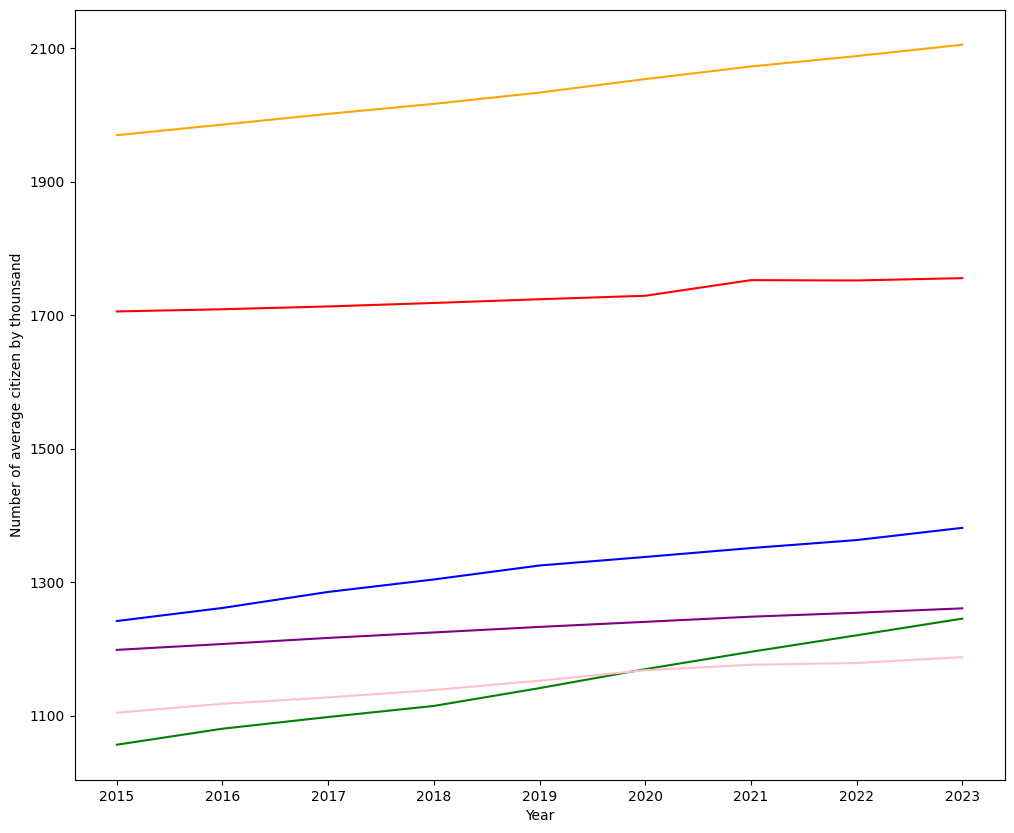

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(noc_by_thousand['year'], noc_by_thousand['Kien_Giang'], color = 'red')
ax.plot(noc_by_thousand['year'], noc_by_thousand['Hai_Phong'], color = 'orange')
ax.plot(noc_by_thousand['year'], noc_by_thousand['Quang_Ninh'], color = 'blue')
ax.plot(noc_by_thousand['year'], noc_by_thousand['Da_Nang'], color = 'green')
ax.plot(noc_by_thousand['year'], noc_by_thousand['Khanh_Hoa'], color = 'purple')
ax.plot(noc_by_thousand['year'], noc_by_thousand['Vung_Tau'], color = 'pink')

plt.xlabel("Year")
plt.ylabel("Number of average citizen by thounsand")

plt.yticks([1100,1300,1500,1700,1900,2100])
plt.show()

Text(0, 0.5, 'Number of citizens (thousand people)')

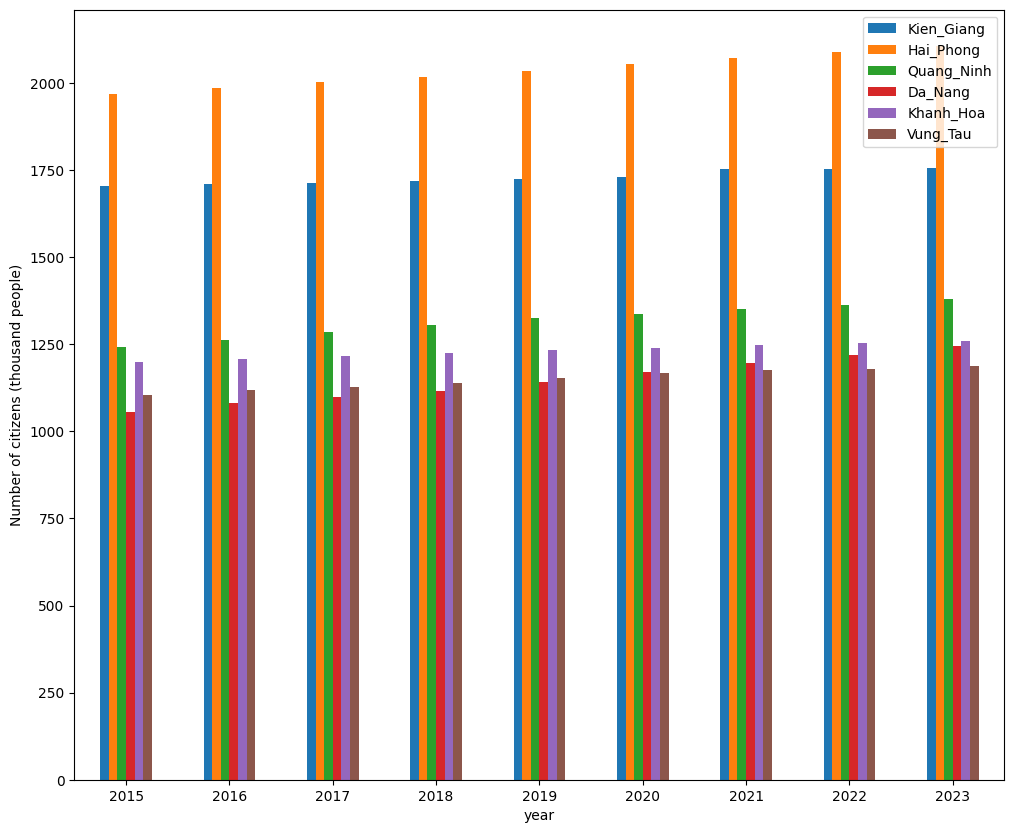

In [20]:
noc_by_thousand_bar = noc_by_thousand.plot.bar(x='year', y=locations, rot=0, figsize=(12,10))
plt.ylabel("Number of citizens (thousand people)")

Text(0, 0.5, 'Thousand tons')

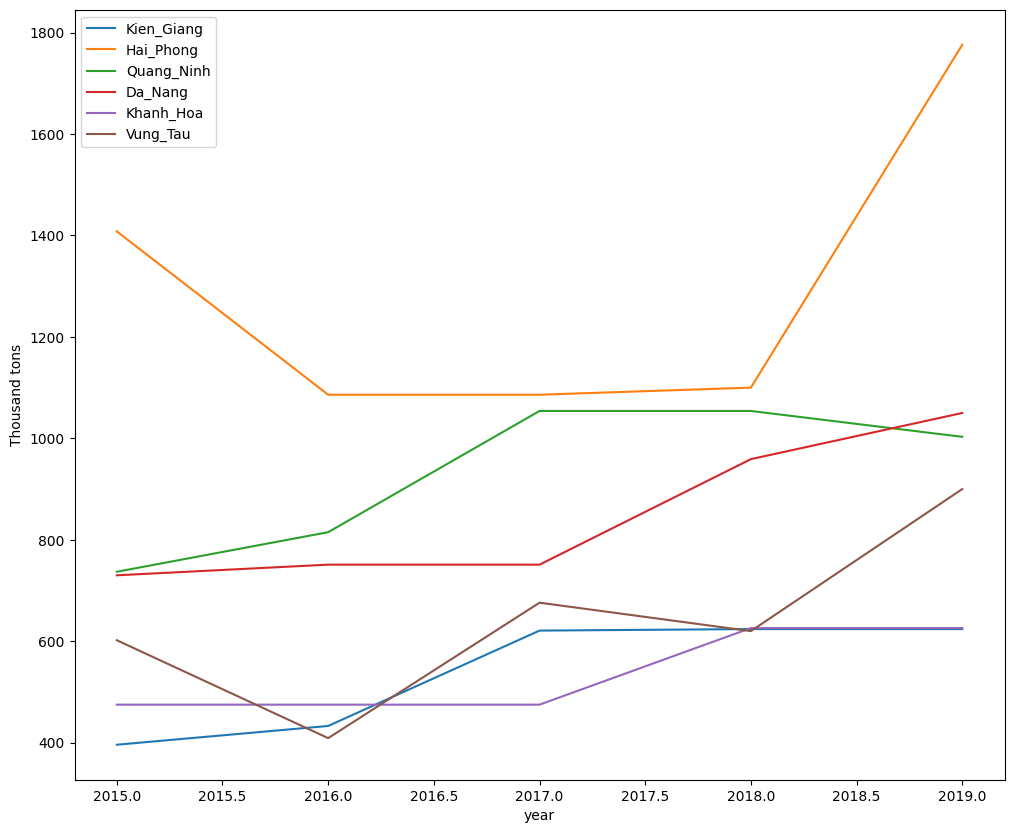

In [21]:
cw_chart = cw.plot.line(x='year', y=locations,rot=0, figsize=(12,10))

plt.ylabel("Thousand tons")

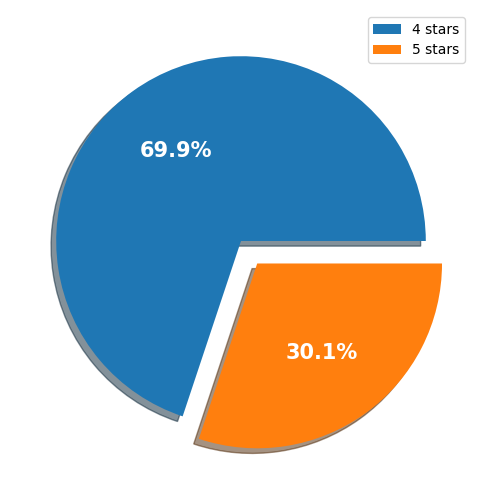

In [22]:
x = review_data['hotelRank'].value_counts()

explode = [0, 0.15]
labels = ['4 stars', '5 stars']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

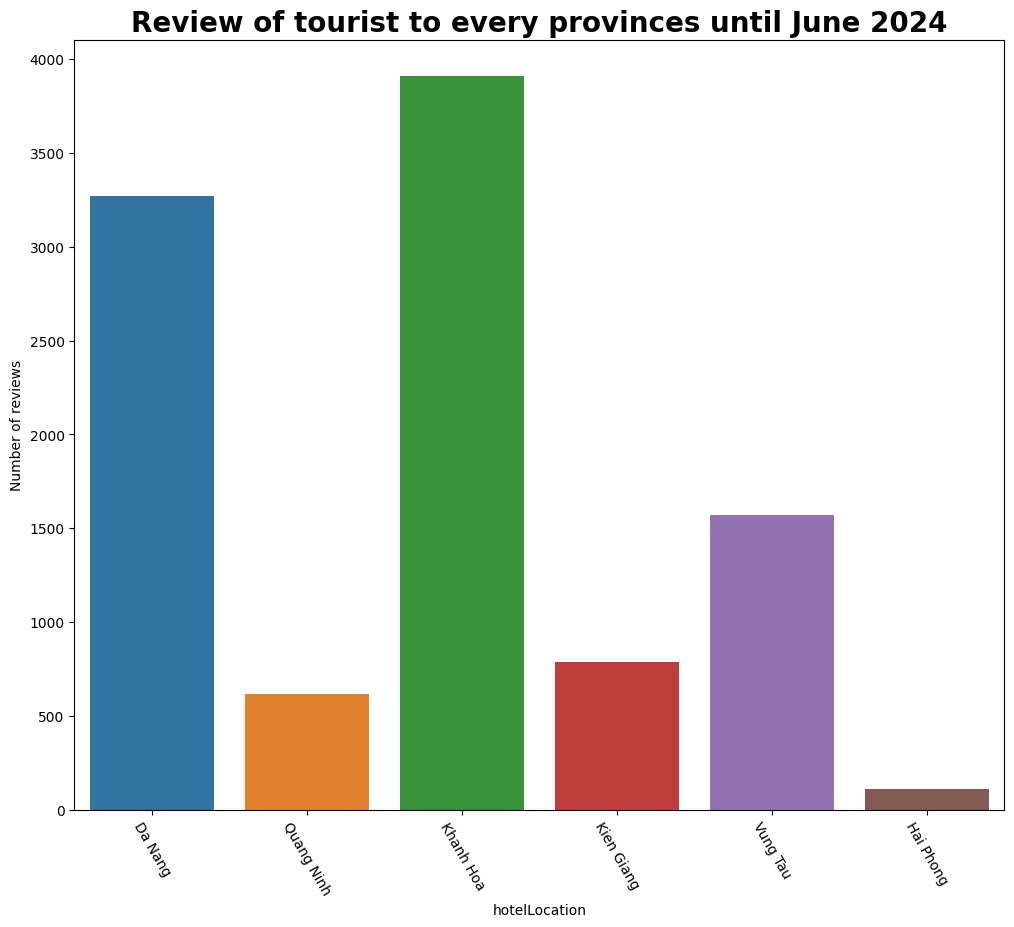

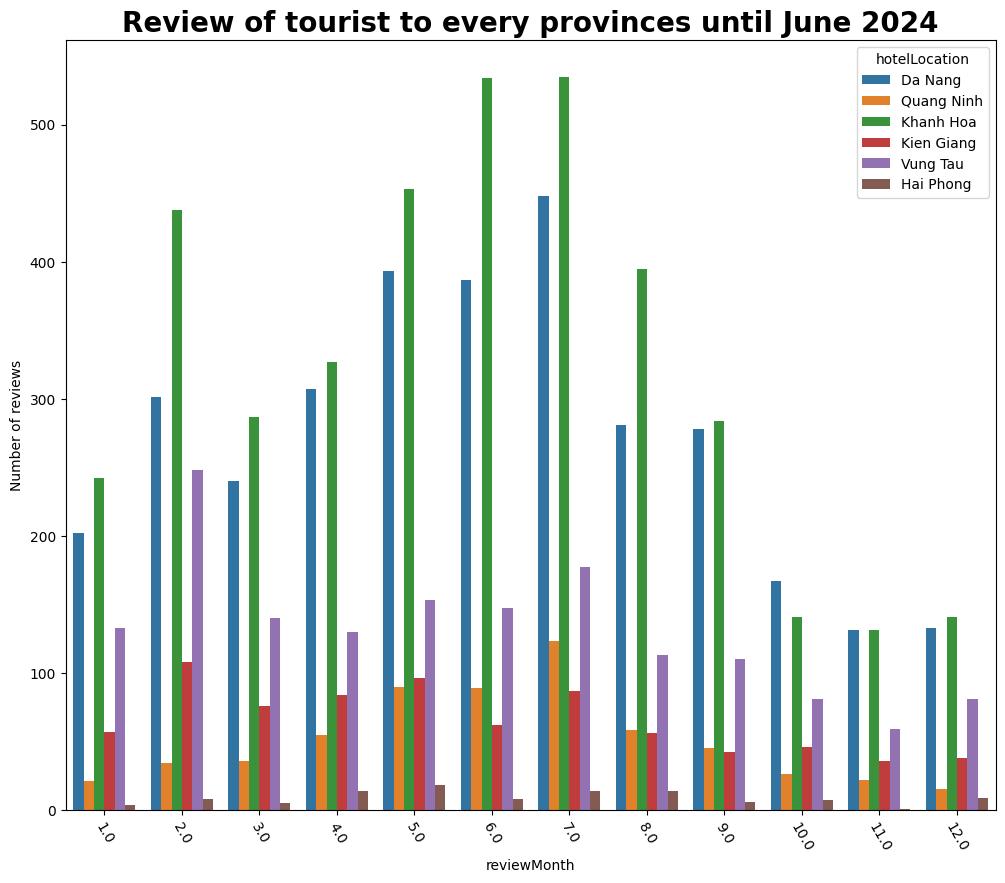

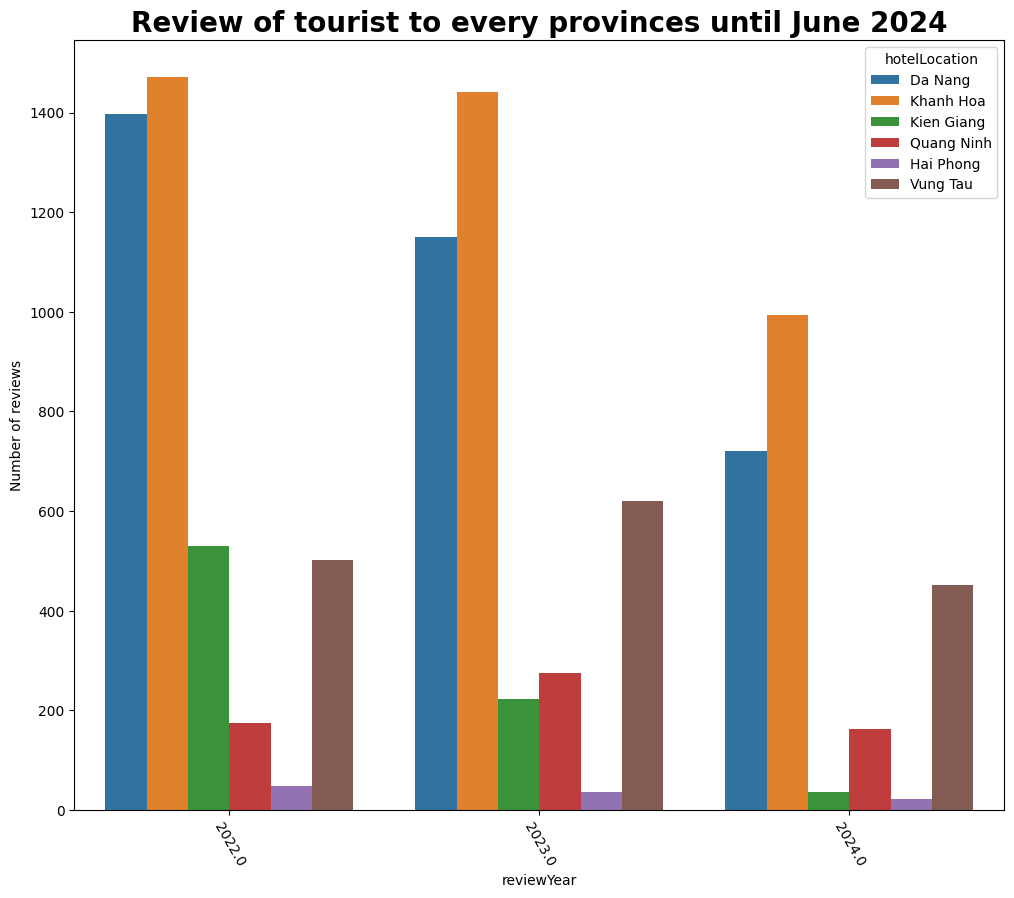

In [23]:
# Visualization base on review_data

categorical_columns = ['hotelLocation','reviewMonth','reviewYear'] 

i=0
# n=0
while i<3 :
    fig = plt.figure(figsize=(12, 10))
    ax = sns.countplot(x=categorical_columns[i], data=review_data, hue="hotelLocation")
    # while n < 3:
    #     ax.bar_label(ax.containers[n])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.ylabel("Number of reviews")
    plt.title("Review of tourist to every provinces until June 2024",size =20, weight = "bold")
    plt.show()

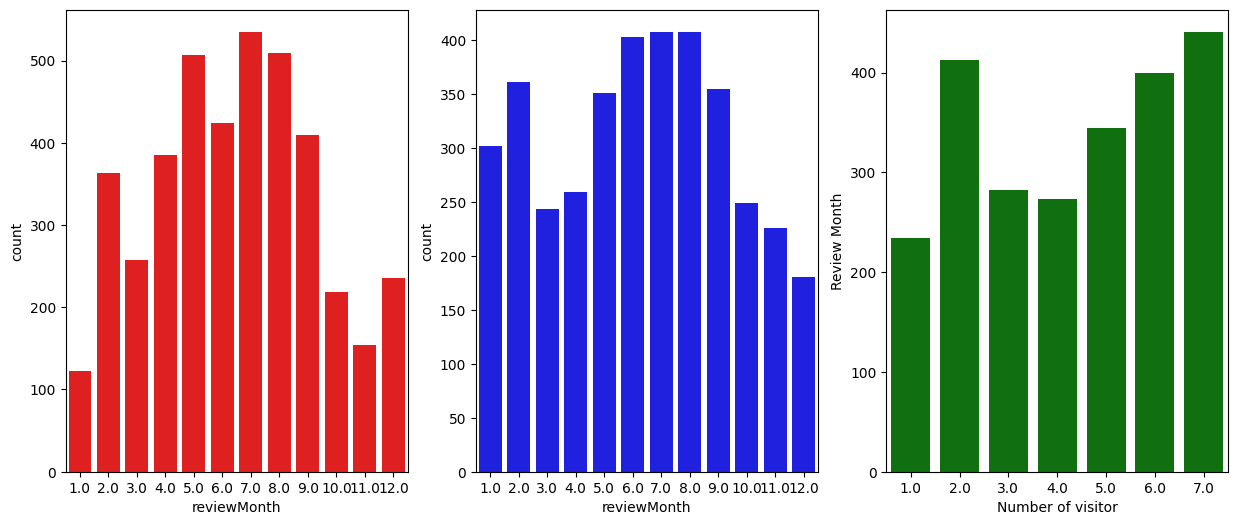

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
plt.subplots_adjust(hspace = 0.5)
sns.countplot(x='reviewMonth', data=review_2022, color='red', ax=ax[0])
sns.countplot(x='reviewMonth', data=review_2023, color='blue', ax=ax[1])
sns.countplot(x='reviewMonth', data=review_2024, color='green', ax=ax[2])
plt.xlabel("Number of visitor")
plt.ylabel("Review Month")
plt.show()

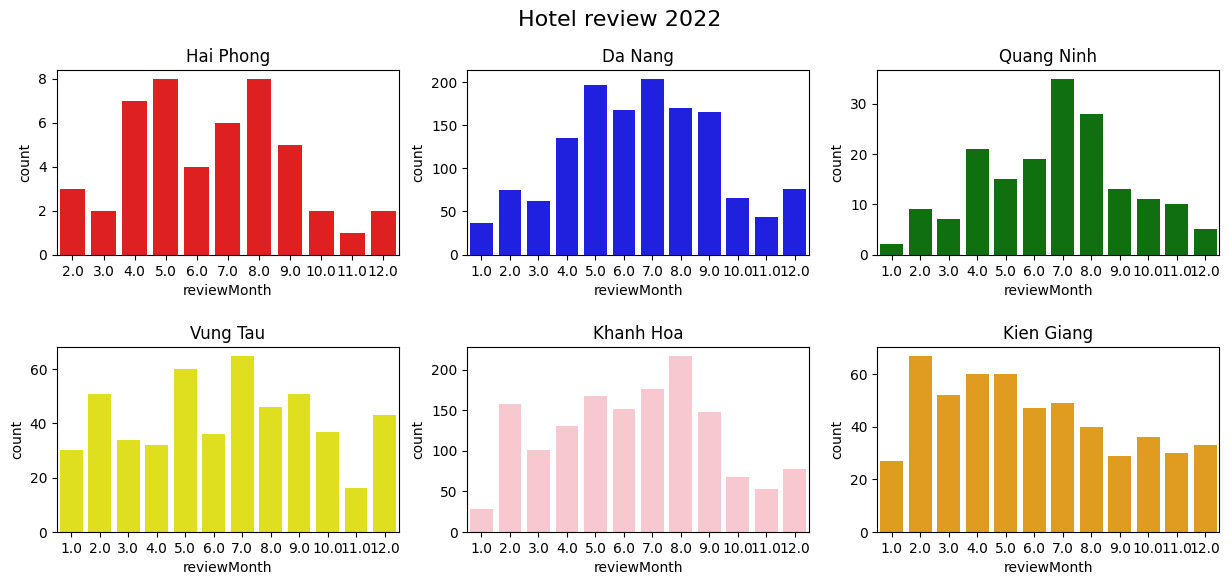

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
plt.subplots_adjust(hspace = 0.5)
sns.countplot(x='reviewMonth', data=hp[hp['reviewYear']==2022], color='red', ax=ax[0,0]).set(title="Hai Phong")
sns.countplot(x='reviewMonth', data=dn[dn['reviewYear']==2022], color='blue', ax=ax[0,1]).set(title="Da Nang")
sns.countplot(x='reviewMonth', data=qn[qn['reviewYear']==2022], color='green', ax=ax[0,2]).set(title="Quang Ninh")
sns.countplot(x='reviewMonth', data=vt[vt['reviewYear']==2022], color='yellow', ax=ax[1,0]).set(title="Vung Tau")
sns.countplot(x='reviewMonth', data=kh[kh['reviewYear']==2022], color='pink', ax=ax[1,1]).set(title="Khanh Hoa")
sns.countplot(x='reviewMonth', data=kg[kg['reviewYear']==2022], color='orange', ax=ax[1,2]).set(title="Kien Giang")
fig.suptitle("Hotel review 2022", fontsize = 16)
plt.show()

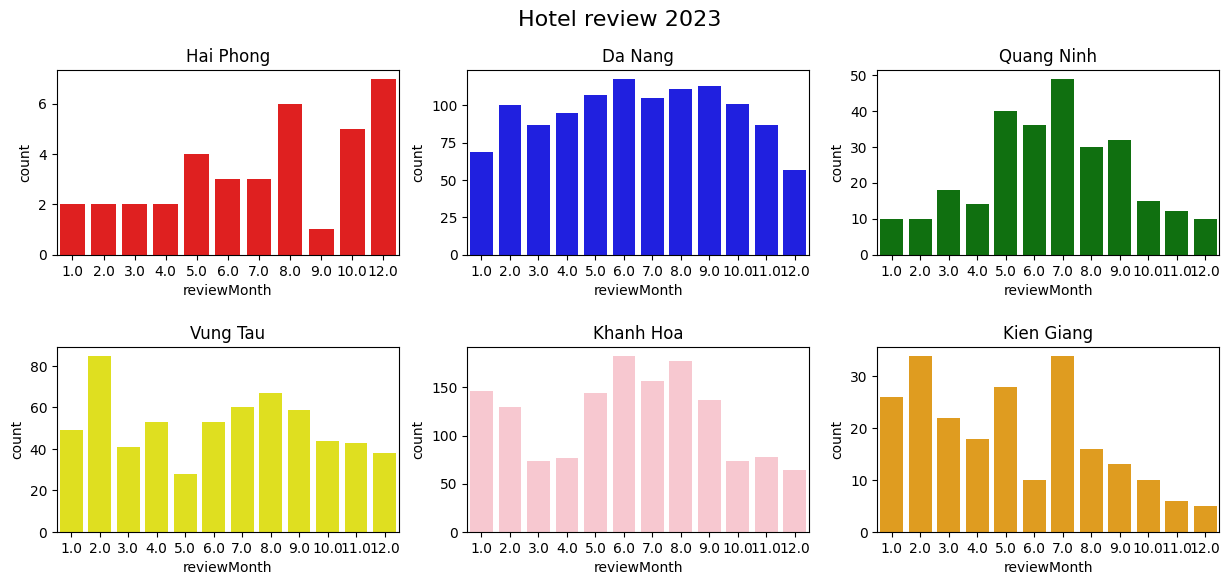

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
plt.subplots_adjust(hspace = 0.5)
sns.countplot(x='reviewMonth', data=hp[hp['reviewYear']==2023], color='red', ax=ax[0,0]).set(title="Hai Phong")
sns.countplot(x='reviewMonth', data=dn[dn['reviewYear']==2023], color='blue', ax=ax[0,1]).set(title="Da Nang")
sns.countplot(x='reviewMonth', data=qn[qn['reviewYear']==2023], color='green', ax=ax[0,2]).set(title="Quang Ninh")
sns.countplot(x='reviewMonth', data=vt[vt['reviewYear']==2023], color='yellow', ax=ax[1,0]).set(title="Vung Tau")
sns.countplot(x='reviewMonth', data=kh[kh['reviewYear']==2023], color='pink', ax=ax[1,1]).set(title="Khanh Hoa")
sns.countplot(x='reviewMonth', data=kg[kg['reviewYear']==2023], color='orange', ax=ax[1,2]).set(title="Kien Giang")
fig.suptitle("Hotel review 2023", fontsize = 16)
plt.show()

([<matplotlib.axis.XTick at 0x22ffac4a390>,
 [Text(0, 0, '2022-01.0'),
  Text(1, 0, '2022-02.0'),
  Text(2, 0, '2022-03.0'),
  Text(3, 0, '2022-04.0'),
  Text(4, 0, '2022-05.0'),
  Text(5, 0, '2022-06.0'),
  Text(6, 0, '2022-07.0'),
  Text(7, 0, '2022-08.0'),
  Text(8, 0, '2022-09.0'),
  Text(9, 0, '2022-10.0'),
  Text(10, 0, '2022-11.0'),
  Text(11, 0, '2022-12.0'),
  Text(12, 0, '2023-01.0'),
  Text(13, 0, '2023-02.0'),
  Text(14, 0, '2023-03.0'),
  Text(15, 0, '2023-04.0'),
  Text(16, 0, '2023-05.0'),
  Text(17, 0, '2023-06.0'),
  Text(18, 0, '2023-07.0'),
  Text(19, 0, '2023-08.0'),
  Text(20, 0, '2023-09.0'),
  Text(21, 0, '2023-10.0'),
  Text(22, 0, '2023-11.0'),
  Text(23, 0, '2023-12.0'),
  Text(24, 0, '2024-01.0'),
  Text(25, 0, '2024-02.0'),
  Text(26, 0, '2024-03.0'),
  Text(27, 0, '2024-04.0'),
  Text(28, 0, '2024-05.0'),
  Text(29, 0, '2024-06.0'),
  Text(30, 0, '2024-07.0')])

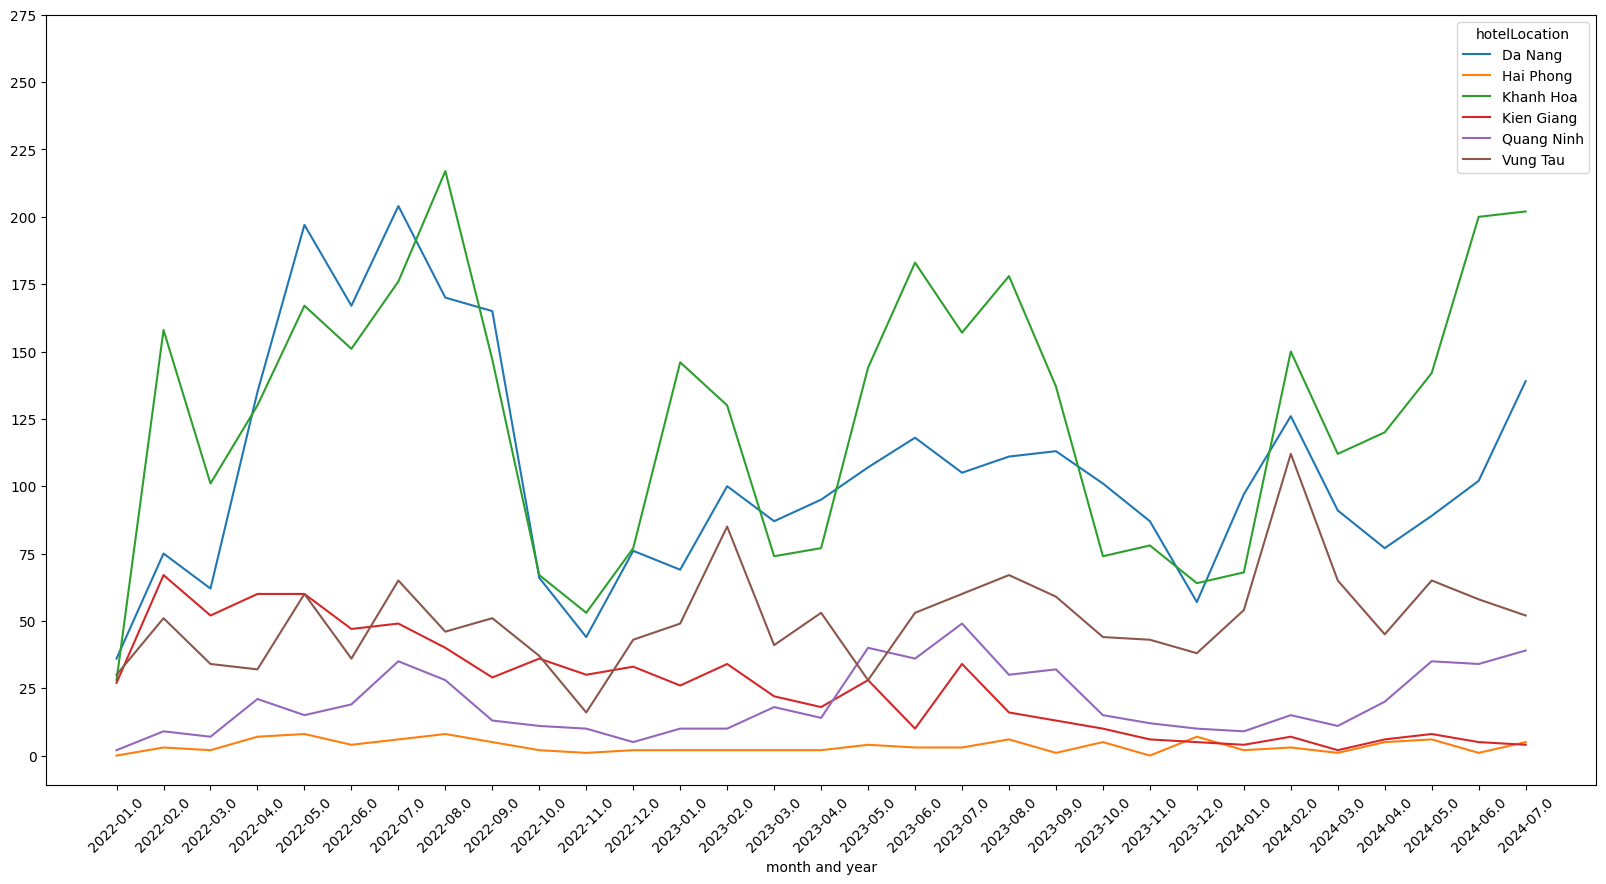

In [27]:
# Counting graph by kilo per day per person
count_by_month_year = review_data.sort_values(by=['month and year']).pivot_table(index = 'month and year', 
                          columns = 'hotelLocation', 
                          fill_value = 0, 
                          aggfunc={'month and year':len})['month and year']
count_by_month_year.plot.line(figsize=(20,10))
plt.yticks(np.arange(0,300,step=25))
plt.xticks(ticks=np.arange(len(count_by_month_year.index)), labels=count_by_month_year.index, rotation=45)

<a id="folium"></a>
<h4><b><span style="color:#005f26">🔶 3.3 | </span><span style="color:#ff6200">Map Visualization</span></b></h4>

In [28]:
vietnam_coordinate = [15.9030623,105.8066925]
province_coordinate = pd.read_sql('select * from province', conn)
province_coordinate

C:\Users\minhv\AppData\Local\Temp\ipykernel_16960\4161311837.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  province_coordinate = pd.read_sql('select * from province', conn)


provinceName   proLat  proLong
0     Vung Tau  10.3460  107.084
1    Hai Phong  20.8648  106.683
2      Da Nang  16.0678  108.221
3    Khanh Hoa  12.2500  109.200
4   Kien Giang  10.0000  105.167
5   Quang Ninh  15.1167  108.800
6   Kien Giang  10.2240  103.954

In [29]:
hotel_coordinate.head()

hotelID                         hotelName hotelLocation  hotelRank  \
0        1          A La Carte Da Nang Beach       Da Nang          4   
1        2      A La Carte Ha Long Bay Hotel    Quang Ninh          5   
2        3  A La Carte Ha Long Bay Residence    Quang Ninh          5   
3        4              Adela Boutique Hotel       Da Nang          4   
4        5       Alana Nha Trang Beach Hotel     Khanh Hoa          4   

   hotelLat  hotelLong  
0   16.0699    108.245  
1   20.9536    107.003  
2   20.9531    107.003  
3   16.0534    108.244  
4   12.2339    109.197

In [30]:
site_map = folium.Map(location=vietnam_coordinate, zoom_start=5)
marker_cluster = MarkerCluster()
site_map.add_child(marker_cluster)

for index, record in hotel_coordinate.iterrows():
    coordinate = [record['hotelLat'], record['hotelLong']]
    # TODO: Create and add a Marker cluster to the site map
    marker = folium.Marker(coordinate, icon=folium.Icon(color='white',icon_color='green'))
    marker_cluster.add_child(marker)
site_map

<a id="norm"></a>
<h4><b><span style="color:#005f26">🔶 Step 3.4 | </span><span style="color:#ff6200">Normalization</span></b></h4>

In [31]:
# Define Linear regression function of Hai Phong
hp_slope, hp_intercept, hp_r, hp_p, hp_std_err = stats.linregress(noc_2015_2019['Hai_Phong'], cw_per_year['Hai_Phong'])
def HPfunc(x):
  return hp_slope * x + hp_intercept

# Define Linear regression function of Vung Tau
vt_slope, vt_intercept, vt_r, vt_p, vt_std_err = stats.linregress(noc_2015_2019['Vung_Tau'], cw_per_year['Vung_Tau'])
def VTfunc(x):
  return vt_slope * x + vt_intercept

# Define Linear regression function of Kien Giang
kg_slope, kg_intercept, kg_r, kg_p, kg_std_err = stats.linregress(noc_2015_2019['Kien_Giang'],cw_per_year['Kien_Giang'])
def KGfunc(x):
  return kg_slope * x + kg_intercept

# Define Linear regression function of Da Nang
dn_slope, dn_intercept, dn_r, dn_p, dn_std_err = stats.linregress(noc_2015_2019['Da_Nang'], cw_per_year['Da_Nang'])
def DNfunc(x):
  return dn_slope * x + dn_intercept

# Define Linear regression function of Quang Ninh
qn_slope, qn_intercept, qn_r, qn_p, qn_std_err = stats.linregress(noc_2015_2019['Quang_Ninh'], cw_per_year['Quang_Ninh'])
def QNfunc(x):
  return qn_slope * x + qn_intercept

# Define Linear regression function of Khanh Hoa
kh_slope, kh_intercept, kh_r, kh_p, kh_std_err = stats.linregress(noc_2015_2019['Khanh_Hoa'], cw_per_year['Khanh_Hoa'])
def KHfunc(x):
  return kh_slope * x + kh_intercept


In [32]:
cw_per_year

year  Kien_Giang  Hai_Phong  Quang_Ninh  Da_Nang  Khanh_Hoa  Vung_Tau
0  2015      144540     513920      269005   266450     173375    219730
1  2016      158045     396390      297475   274115     173375    149285
2  2017      226665     396390      384710   274115     173375    246740
3  2018      227760     401500      384710   350035     228490    226300
4  2019      227760     648240      366095   383250     228490    328500

In [33]:
# Calculating the amount of collected waste around 6 province in 2022 and 2023
# Kien Giang
cw_KG_2022 = np.round(KGfunc(noc_by_thousand['Kien_Giang'][7]*1000),3)
cw_KG_2023 = np.round(KGfunc(noc_by_thousand['Kien_Giang'][8]*1000),3)
# Hai Phong
cw_HP_2022 = np.round(HPfunc(noc_by_thousand['Hai_Phong'][7]*1000),3)
cw_HP_2023 = np.round(HPfunc(noc_by_thousand['Hai_Phong'][8]*1000),3)
# Quang Ninh
cw_QN_2022 = np.round(QNfunc(noc_by_thousand['Quang_Ninh'][7]*1000),3)
cw_QN_2023 = np.round(QNfunc(noc_by_thousand['Quang_Ninh'][8]*1000),3)
# Da Nang
cw_DN_2022 = np.round(DNfunc(noc_by_thousand['Da_Nang'][7]*1000),3)
cw_DN_2023 = np.round(DNfunc(noc_by_thousand['Da_Nang'][8]*1000),3)
# Khanh Hoa
cw_KH_2022 = np.round(KHfunc(noc_by_thousand['Khanh_Hoa'][7]*1000),3)
cw_KH_2023 = np.round(KHfunc(noc_by_thousand['Khanh_Hoa'][8]*1000),3)
# Vung Tau
cw_VT_2022 = np.round(VTfunc(noc_by_thousand['Vung_Tau'][7]*1000),3)
cw_VT_2023 = np.round(VTfunc(noc_by_thousand['Vung_Tau'][8]*1000),3)

In [34]:
# Adding calculated data to table collected waste
additional_cw = pd.DataFrame({
    'year': [2022,2023],
    'Kien_Giang':[cw_KG_2022, cw_KG_2023],
    'Hai_Phong': [cw_HP_2022, cw_HP_2023],
    'Quang_Ninh': [cw_QN_2022, cw_QN_2023],
    'Da_Nang': [cw_DN_2022, cw_DN_2023],
    'Khanh_Hoa': [cw_KH_2022, cw_KH_2023],
    'Vung_Tau': [cw_VT_2022, cw_VT_2023]
})

cw_per_year_new = pd.concat([cw_per_year,additional_cw], ignore_index=False)

In [35]:
# rename column of hotelLocation
review_data['hotelLocation'] = review_data['hotelLocation'].str.replace(' ', '_')

# Tổng hợp dữ liệu X
X_transformed = review_data.groupby(['reviewYear', 'hotelLocation']).agg(
    rating=('rating', 'mean'), 
    total_reviews=('hotelName', 'count')
).reset_index()

# Transform floate to int
X_transformed['reviewYear'] = X_transformed['reviewYear'].astype(int)

X_transformed = X_transformed.rename(columns={'reviewYear':'year'})

# Kiểm tra kết quả
print(X_transformed.head())


   year hotelLocation    rating  total_reviews
0  2022       Da_Nang  8.998568           1397
1  2022     Hai_Phong  8.500000             48
2  2022     Khanh_Hoa  8.988451           1472
3  2022    Kien_Giang  8.781132            530
4  2022    Quang_Ninh  8.548571            175


In [36]:
cw_long = cw_per_year_new.melt(id_vars=['year'], var_name='hotelLocation', value_name='waste_per_year')

noc_long = noc.melt(id_vars=['year'], var_name='hotelLocation', value_name='number_of_citizen')

cw_and_noc = cw_long.merge(noc_long, on=['year', 'hotelLocation'], how='inner')

In [37]:
merged_data = X_transformed.merge(cw_and_noc, on=['year', 'hotelLocation'], how='inner')

merged_data['waste_per_person'] = merged_data['waste_per_year']/(merged_data['total_reviews']+merged_data['number_of_citizen'])

merged_data['total_visit_citizen'] = merged_data['total_reviews']+merged_data['number_of_citizen']

merged_data

year hotelLocation    rating  total_reviews  waste_per_year  \
0   2022       Da_Nang  8.998568           1397      493034.223   
1   2022     Hai_Phong  8.500000             48      624438.417   
2   2022     Khanh_Hoa  8.988451           1472      268074.599   
3   2022    Kien_Giang  8.781132            530      383607.190   
4   2022    Quang_Ninh  8.548571            175      449249.717   
5   2022      Vung_Tau  8.770459            501      361478.792   
6   2023       Da_Nang  9.113043           1150      530556.974   
7   2023     Hai_Phong  8.810811             37      654426.405   
8   2023     Khanh_Hoa  8.974341           1442      280640.473   
9   2023    Kien_Giang  8.941441            222      400780.854   
10  2023    Quang_Ninh  9.003623            276      474287.023   
11  2023      Vung_Tau  9.022581            620      383551.194   

    number_of_citizen  waste_per_person  total_visit_citizen  
0             1220200          0.403598              1221597  
1             2088000          0.299054              2088048  
2             1254000          0.213525              1255472  
3             1751800          0.218913              1752330  
4             1362900          0.329585              1363075  
5             1178700          0.306546              1179201  
6             1245200          0.425689              1246350  
7             2105000          0.310886              2105037  
8             1260600          0.222370              1262042  
9             1755300          0.228297              1755522  
10            1381200          0.343319              1381476  
11            1187500          0.322822              1188120

In [38]:
# Chọn cột đầu vào (X) và đầu ra (Y)
X = merged_data[['year', 'rating', 'total_reviews'] + 
                [col for col in merged_data.columns if 'hotelLocation_' in col]]
Y = merged_data[['waste_per_year', 'number_of_citizen']]  # Đầu ra

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

X_train: (9, 3), X_test: (3, 3)
Y_train: (9, 2), Y_test: (3, 2)


<a id="da-ml"></a>
<h2><b><p style="font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Modeling </p></b></h2>

<a id="init"></a>
<h3><b><span style="color:#005f26">🔶 Step 4.1 | </span><span style="color:#ff6200">Initialization</span></b></h3>

In [39]:
# Đếm số lần xuất hiện theo quarter
quarter_counts = review_data.groupby(['reviewYear','hotelLocation','quarter']).size().reset_index(name='quarter_count')
quarter_counts['reviewYear'] = quarter_counts['reviewYear'].astype(int)
quarter_counts = quarter_counts.rename(columns={'reviewYear':'year'})
# Thay dấu cách bằng dấu gạch dưới trong cột 'hotelLocation'
quarter_counts['hotelLocation'] = quarter_counts['hotelLocation'].str.replace(' ', '_')

# Đếm số lần xuất hiện theo season
season_counts = review_data.groupby(['reviewYear','hotelLocation','season']).size().reset_index(name='season_count')
season_counts['reviewYear'] = season_counts['reviewYear'].astype(int)
season_counts = season_counts.rename(columns={'reviewYear':'year'})
season_counts['hotelLocation'] = season_counts['hotelLocation'].str.replace(' ', '_')


<a id="data-ana"></a>
<h3><b><span style="color:#005f26">🔶 Step 4.2 | </span><span style="color:#ff6200">Data Analytics</span></b></h3>

In the following section, we will applying 4 technique in analytics are Information Gain, Cor-relationship, linear regression and clustering K-means, to found out the relationship between total of waste in a province for a year and number of traveler in every province.

<a id="ig"></a>
<h4><b><span style="color:#005f26">🔶 Step 4.2.1 | </span><span style="color:#ff6200">Information Gain</span></b></h4>

In [40]:
# Return the Information Gain between 
# the total number of visitors and waste per year
info_gain = mutual_info_regression(merged_data[['total_reviews']], merged_data['waste_per_year'], random_state=42)
info_gain

array([0.05099507])

<a id="corr"></a>
<h4><b><span style="color:#005f26">🔶 Step 4.2.2 | </span><span style="color:#ff6200">Cor-Relationship</span></b></h4>

In [41]:
# Tính hệ số tương quan Pearson
correlation = merged_data['total_reviews'].corr(merged_data['waste_per_year'])
print("Pearson Correlation between total_reviews and waste_per_year: "+ correlation.astype(str))

Pearson Correlation between total_reviews and waste_per_year: -0.5449013037468513


That show if the number of visitors increase, the waste are also increasing.

<a id="ln"></a>
<h4><b><span style="color:#005f26">🔶 Step 4.2.3 | </span><span style="color:#ff6200">Linear Regression</span></b></h4>

In [42]:
merged_data

year hotelLocation    rating  total_reviews  waste_per_year  \
0   2022       Da_Nang  8.998568           1397      493034.223   
1   2022     Hai_Phong  8.500000             48      624438.417   
2   2022     Khanh_Hoa  8.988451           1472      268074.599   
3   2022    Kien_Giang  8.781132            530      383607.190   
4   2022    Quang_Ninh  8.548571            175      449249.717   
5   2022      Vung_Tau  8.770459            501      361478.792   
6   2023       Da_Nang  9.113043           1150      530556.974   
7   2023     Hai_Phong  8.810811             37      654426.405   
8   2023     Khanh_Hoa  8.974341           1442      280640.473   
9   2023    Kien_Giang  8.941441            222      400780.854   
10  2023    Quang_Ninh  9.003623            276      474287.023   
11  2023      Vung_Tau  9.022581            620      383551.194   

    number_of_citizen  waste_per_person  total_visit_citizen  
0             1220200          0.403598              1221597  
1             2088000          0.299054              2088048  
2             1254000          0.213525              1255472  
3             1751800          0.218913              1752330  
4             1362900          0.329585              1363075  
5             1178700          0.306546              1179201  
6             1245200          0.425689              1246350  
7             2105000          0.310886              2105037  
8             1260600          0.222370              1262042  
9             1755300          0.228297              1755522  
10            1381200          0.343319              1381476  
11            1187500          0.322822              1188120

Mean Squared Error (MSE): 8014535923.013207
R-squared (R²): 0.4035553647269189


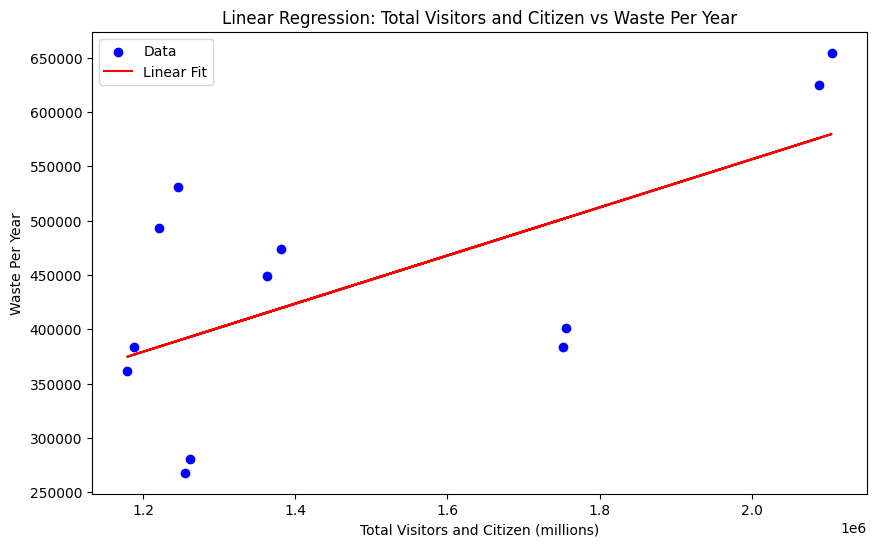

In [43]:
X_lr = (merged_data['total_reviews']+merged_data['number_of_citizen']).values.reshape(-1,1)
y_lr = merged_data['waste_per_year'].values

# create training model
model = LinearRegression()
model.fit(X_lr, y_lr)

# Prediction
y_pred = model.predict(X_lr)

# Calculating mse and r square for further judging
mse = mean_squared_error(y_lr, y_pred)
r2 = r2_score(y_lr, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# create diagram
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['total_reviews']+merged_data['number_of_citizen'], merged_data['waste_per_year'], color='blue', label='Data')
plt.plot(merged_data['total_reviews']+merged_data['number_of_citizen'], y_pred, color='red', label='Linear Fit')
plt.xlabel('Total Visitors and Citizen (millions)')
plt.ylabel('Waste Per Year')
plt.title('Linear Regression: Total Visitors and Citizen vs Waste Per Year')
plt.legend()
plt.show()


As we can see on the graph, there are 2 outlier, which both comming from Khanh Hoa at year 2022 and 2023, which lead to the high number of MSE and R square only reach 40%, make the model cannot be grade as good enough.

Mean Squared Error (MSE): 0.004592230104575089
R-squared (R²): 0.0005201055150932943


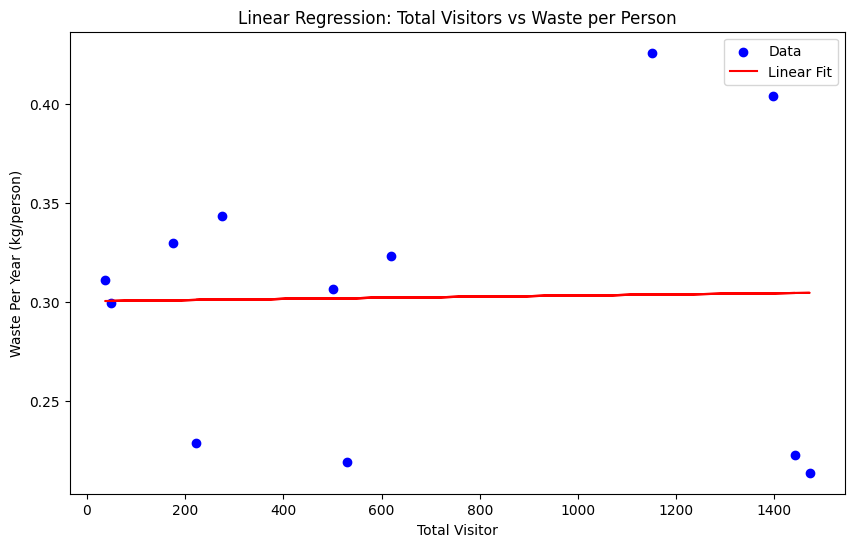

In [44]:
X_lr = merged_data['total_reviews'].values.reshape(-1,1)
y_lr = merged_data['waste_per_person'].values

# create training model
model = LinearRegression()
model.fit(X_lr, y_lr)

# Prediction
y_pred = model.predict(X_lr)

# Calculating mse and r square for further judging
mse = mean_squared_error(y_lr, y_pred)
r2 = r2_score(y_lr, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# create diagram
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['total_reviews'], merged_data['waste_per_person'], color='blue', label='Data')
plt.plot(merged_data['total_reviews'], y_pred, color='red', label='Linear Fit')
plt.xlabel('Total Visitor')
plt.ylabel('Waste Per Year (kg/person)')
plt.title('Linear Regression: Total Visitors vs Waste per Person')
plt.legend()
plt.show()


<a id="kmeans"></a>
<h4><b><span style="color:#005f26">🔶 Step 4.2.4 | </span><span style="color:#ff6200">Clustering K-means</span></b></h4>

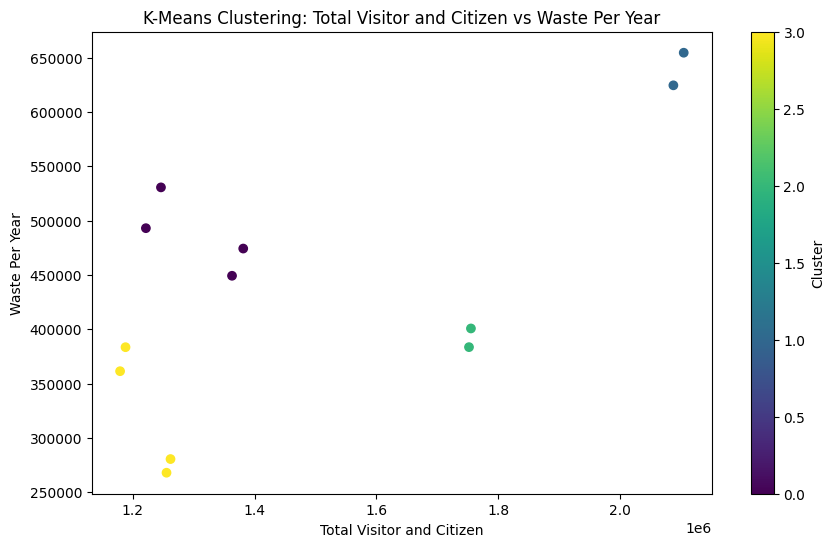

In [45]:
cluster_citi_waste = merged_data[['total_visit_citizen', 'waste_per_year']]

kmeans = KMeans(n_clusters=4, random_state=42)
merged_data['cluster_citi_waste'] = kmeans.fit_predict(cluster_citi_waste)

# Vẽ biểu đồ các cụm
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['total_visit_citizen'], merged_data['waste_per_year'], c=merged_data['cluster_citi_waste'], cmap='viridis')
plt.xlabel('Total Visitor and Citizen')
plt.ylabel('Waste Per Year')
plt.title('K-Means Clustering: Total Visitor and Citizen vs Waste Per Year')
plt.colorbar(label='Cluster')
plt.show()

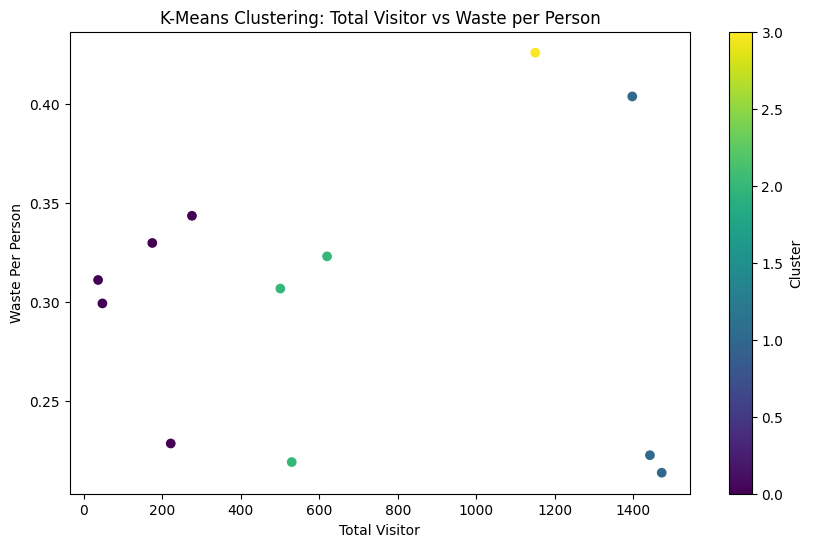

In [46]:
cluster_visit_waste = merged_data[['total_reviews', 'waste_per_person']]

# K-Means với 3 cụm
kmeans = KMeans(n_clusters=4, random_state=42)
merged_data['cluster_visit_waste'] = kmeans.fit_predict(cluster_visit_waste)

# Vẽ biểu đồ các cụm
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['total_reviews'], merged_data['waste_per_person'], c=merged_data['cluster_visit_waste'], cmap='viridis')
plt.xlabel('Total Visitor')
plt.ylabel('Waste Per Person')
plt.title('K-Means Clustering: Total Visitor vs Waste per Person')
plt.colorbar(label='Cluster')
plt.show()

<a id="ml"></a>
<h3><b><span style="color:#005f26">🔶 Step 4.3 | </span><span style="color:#ff6200">Modeling</span></b></h3>

We will be using `quarter_counts` and `season_counts` for the following 4 models. By adding a classification to check and create prediction for the question of which season or quarter will have the most visitor. 

In [47]:
# Quarter classifier
quarter_counts['peak_quarter'] = (
    quarter_counts.groupby(['year', 'hotelLocation'])['quarter_count']
    .transform(lambda x: (x >= x.mean()).astype(int))
)

# season classifier
season_counts['peak_season'] = (
    season_counts.groupby(['year', 'hotelLocation'])['season_count']
    .transform(lambda x: (x >= x.mean()).astype(int))
)

# merging data to X_quarter and X_season 
X_quarter = pd.merge(
    X_transformed, quarter_counts[['year', 'hotelLocation', 'quarter', 'peak_quarter']],
    on=['year', 'hotelLocation'], how='left'
)
X_season = pd.merge(
    X_transformed, season_counts[['year', 'hotelLocation', 'season', 'peak_season']],
    on=['year', 'hotelLocation'], how='left'
)

In [48]:
X_season

year hotelLocation    rating  total_reviews  season  peak_season
0   2022       Da_Nang  8.998568           1397       1            1
1   2022       Da_Nang  8.998568           1397       2            1
2   2022       Da_Nang  8.998568           1397       3            0
3   2022       Da_Nang  8.998568           1397       4            0
4   2022     Hai_Phong  8.500000             48       1            1
..   ...           ...       ...            ...     ...          ...
61  2024    Quang_Ninh  8.674847            163       2            1
62  2024    Quang_Ninh  8.674847            163       4            0
63  2024      Vung_Tau  9.104213            451       1            1
64  2024      Vung_Tau  9.104213            451       2            0
65  2024      Vung_Tau  9.104213            451       4            1

[66 rows x 6 columns]

In [49]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Low Visitor', 'High Visitor']); ax.yaxis.set_ticklabels(['Low Visitor', 'High Visitor']) 
    plt.show() 

<a id="log-reg"></a>
<h5><b><span style="color:#005f26">🔶 Step 4.3.1.1 | </span><span style="color:#ff6200">Logistic Regression</span></b></h5>

In [50]:
# Chọn đặc trưng và nhãn mục tiêu
X_quarter_features = quarter_counts[['quarter_count', 'quarter']]
y_quarter_target = quarter_counts['peak_quarter']

# Chia dữ liệu thành train/test
X_quarter_train, X_quarter_test, y_quarter_train, y_quarter_test = train_test_split(X_quarter_features, y_quarter_target, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện Logistic Regression
log_quarter_model = LogisticRegression(random_state=42)
log_quarter_model.fit(X_quarter_train, y_quarter_train)

# Dự đoán và đánh giá
y_quarter_pred = log_quarter_model.predict(X_quarter_test)

print("Confusion Matrix (Quarter):")
print(confusion_matrix(y_quarter_test, y_quarter_pred))
print("\nClassification Report (Quarter):")
print(classification_report(y_quarter_test, y_quarter_pred))

Confusion Matrix (Quarter):
[[3 3]
 [3 5]]

Classification Report (Quarter):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.62      0.62      0.62         8

    accuracy                           0.57        14
   macro avg       0.56      0.56      0.56        14
weighted avg       0.57      0.57      0.57        14



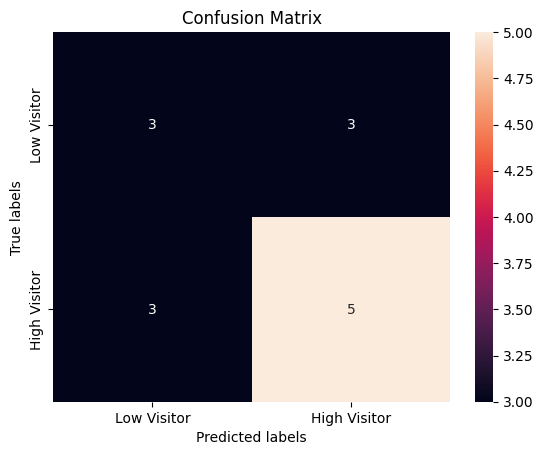

In [51]:
plot_confusion_matrix(y_quarter_test, y_quarter_pred)

In [52]:
# Define season as target
X_season_features = season_counts[['season_count', 'season']]
y_season_target = season_counts['peak_season']

# Define training / testing set
X_season_train, X_season_test, y_season_train, y_season_test = train_test_split(X_season_features, y_season_target, test_size=0.2, random_state=42)

# Create / train Logistic Regression
log_season_model = LogisticRegression(random_state=42)
log_season_model.fit(X_season_train, y_season_train)

# Prediction
y_season_pred = log_season_model.predict(X_season_test)

print("Confusion Matrix (Season):")
print(confusion_matrix(y_season_test, y_season_pred))
print("\nClassification Report (Season):")
print(classification_report(y_season_test, y_season_pred))


Confusion Matrix (Season):
[[2 1]
 [2 9]]

Classification Report (Season):
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.90      0.82      0.86        11

    accuracy                           0.79        14
   macro avg       0.70      0.74      0.71        14
weighted avg       0.81      0.79      0.80        14



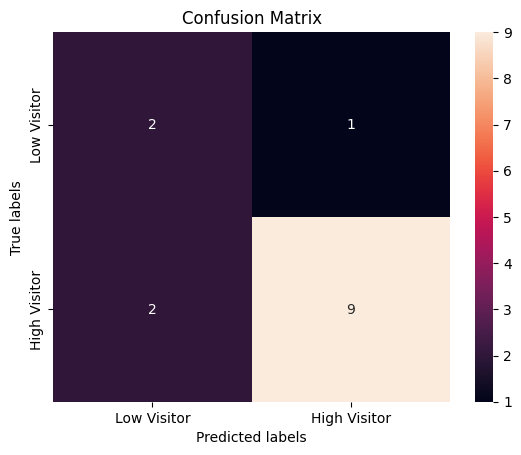

In [53]:
plot_confusion_matrix(y_season_test, y_season_pred)

<a id="knc"></a>
<h5><b><span style="color:#005f26">🔶 Step 4.3.1.2 | </span><span style="color:#ff6200">K-Neighbors Classifier</span></b></h5>

In [54]:
# Khởi tạo và huấn luyện mô hình KNN
knn_quarter_model = KNeighborsClassifier(n_neighbors=5)
knn_quarter_model.fit(X_quarter_train, y_quarter_train)

# Dự đoán và đánh giá
y_quarter_knn_pred = knn_quarter_model.predict(X_quarter_test)

print("Confusion Matrix (Quarter):")
print(confusion_matrix(y_quarter_test, y_quarter_knn_pred))
print("\nClassification Report (Quarter):")
print(classification_report(y_quarter_test, y_quarter_knn_pred))

Confusion Matrix (Quarter):
[[2 4]
 [1 7]]

Classification Report (Quarter):
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.64      0.88      0.74         8

    accuracy                           0.64        14
   macro avg       0.65      0.60      0.59        14
weighted avg       0.65      0.64      0.61        14



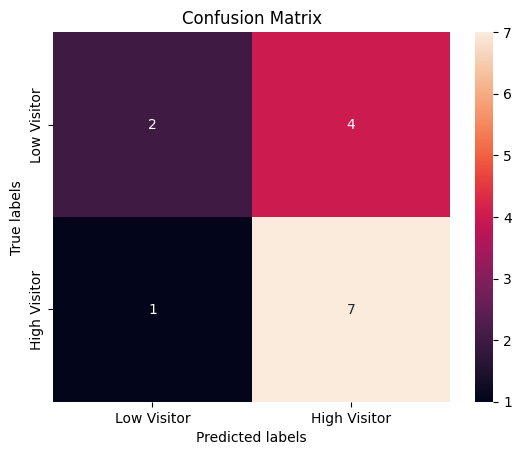

In [55]:
plot_confusion_matrix(y_quarter_test, y_quarter_knn_pred)

In [56]:
# Khởi tạo và huấn luyện mô hình KNN
knn_season_model = KNeighborsClassifier(n_neighbors=5)
knn_season_model.fit(X_season_train, y_season_train)

# Dự đoán và đánh giá
y_season_knn_pred = knn_season_model.predict(X_season_test)

print("Confusion Matrix (Quarter):")
print(confusion_matrix(y_season_test, y_season_knn_pred))
print("\nClassification Report (Quarter):")
print(classification_report(y_season_test, y_season_knn_pred))

Confusion Matrix (Quarter):
[[3 0]
 [6 5]]

Classification Report (Quarter):
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         3
           1       1.00      0.45      0.62        11

    accuracy                           0.57        14
   macro avg       0.67      0.73      0.56        14
weighted avg       0.86      0.57      0.60        14



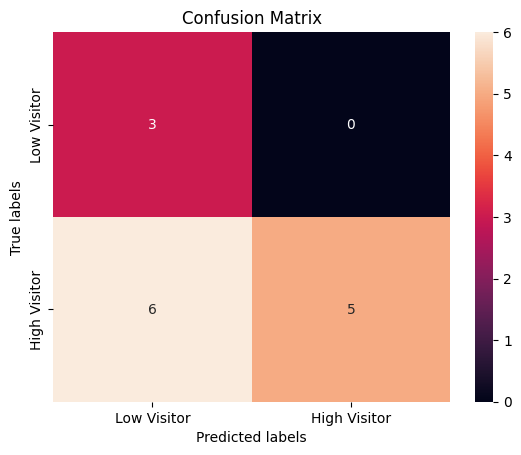

In [57]:
plot_confusion_matrix(y_season_test, y_season_knn_pred)

<a id="tree_ss"></a>
<h5><b><span style="color:#005f26">🔶 Step 4.3.1.3 | </span><span style="color:#ff6200">Decision Tree Classifier</span></b></h5>

In [58]:
# Khởi tạo và huấn luyện mô hình Decision Tree
tree_quarter_model = DecisionTreeClassifier(random_state=42)
tree_quarter_model.fit(X_quarter_train, y_quarter_train)

# Dự đoán và đánh giá
y_quarter_tree_pred = tree_quarter_model.predict(X_quarter_test)

print("Confusion Matrix (Quarter):")
print(confusion_matrix(y_quarter_test, y_quarter_tree_pred))
print("\nClassification Report (Quarter):")
print(classification_report(y_quarter_test, y_quarter_tree_pred))

Confusion Matrix (Quarter):
[[0 6]
 [2 6]]

Classification Report (Quarter):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.75      0.60         8

    accuracy                           0.43        14
   macro avg       0.25      0.38      0.30        14
weighted avg       0.29      0.43      0.34        14



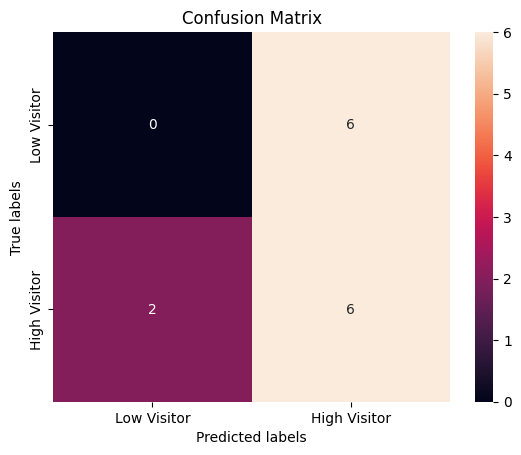

In [59]:
plot_confusion_matrix(y_quarter_test, y_quarter_tree_pred)

In [60]:
# Khởi tạo và huấn luyện mô hình Decision Tree
tree_season_model = DecisionTreeClassifier(random_state=42)
tree_season_model.fit(X_season_train, y_season_train)

# Dự đoán và đánh giá
y_season_tree_pred = tree_season_model.predict(X_season_test)

print("Confusion Matrix (Quarter):")
print(confusion_matrix(y_season_test, y_season_tree_pred))
print("\nClassification Report (Quarter):")
print(classification_report(y_season_test, y_season_tree_pred))

Confusion Matrix (Quarter):
[[ 2  1]
 [ 1 10]]

Classification Report (Quarter):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.91      0.91      0.91        11

    accuracy                           0.86        14
   macro avg       0.79      0.79      0.79        14
weighted avg       0.86      0.86      0.86        14



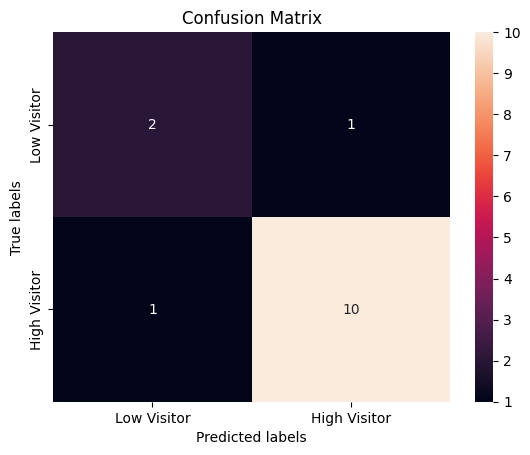

In [61]:
plot_confusion_matrix(y_season_test, y_season_tree_pred)

<a id="SVC"></a>
<h4><b><span style="color:#005f26">🔶 Step 4.3.1.4 | </span><span style="color:#ff6200">SVC</span></b></h4>

In [62]:
# Huấn luyện mô hình SVM
svm_quarter_model = SVC(kernel='linear', random_state=42)
svm_quarter_model.fit(X_quarter_train, y_quarter_train)

# Dự đoán và đánh giá
while i < 5:
    y_quarter_svm_pred = svm_quarter_model.predict(X_quarter_test)
    i = i + 1

print("Confusion Matrix (Quarter):")
print(confusion_matrix(y_quarter_test, y_quarter_svm_pred))
print("\nClassification Report (Quarter):")
print(classification_report(y_quarter_test, y_quarter_svm_pred))

Confusion Matrix (Quarter):
[[2 4]
 [2 6]]

Classification Report (Quarter):
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.60      0.75      0.67         8

    accuracy                           0.57        14
   macro avg       0.55      0.54      0.53        14
weighted avg       0.56      0.57      0.55        14



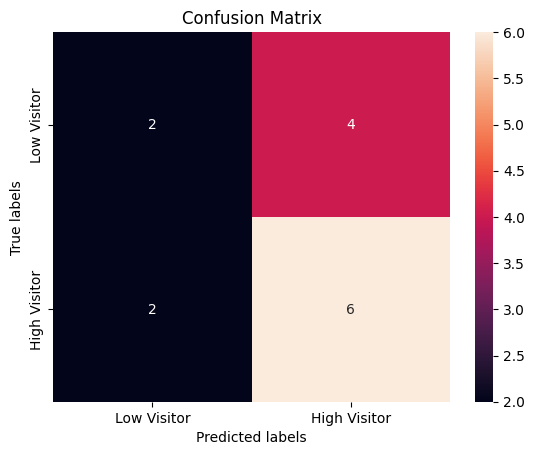

In [63]:
plot_confusion_matrix(y_quarter_test, y_quarter_svm_pred)

In [64]:
# Huấn luyện mô hình SVM
svm_season_model = SVC(kernel='linear', random_state=42)
svm_season_model.fit(X_season_train, y_season_train)

# Dự đoán và đánh giá
y_season_svm_pred = svm_season_model.predict(X_season_test)

print("Confusion Matrix (Quarter):")
print(confusion_matrix(y_season_test, y_season_svm_pred))
print("\nClassification Report (Quarter):")
print(classification_report(y_season_test, y_season_svm_pred))

Confusion Matrix (Quarter):
[[2 1]
 [2 9]]

Classification Report (Quarter):
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.90      0.82      0.86        11

    accuracy                           0.79        14
   macro avg       0.70      0.74      0.71        14
weighted avg       0.81      0.79      0.80        14



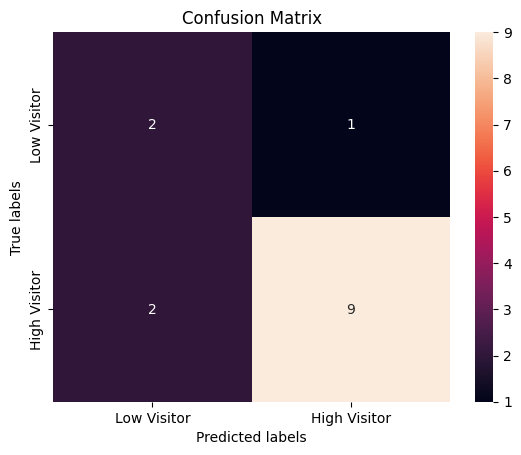

In [65]:
plot_confusion_matrix(y_season_test, y_season_svm_pred)

<a id="cluster-result"></a>
<h5><b><span style="color:#005f26">🔶 Step 4.3.1.5 | </span><span style="color:#ff6200">Clustering Model Comparision</span></b></h5>

In [66]:
print("SVM Accuracy:", svm_quarter_model.score(X_quarter_test, y_quarter_test))
print("Decision Tree Accuracy:", tree_quarter_model.score(X_quarter_test, y_quarter_test))
print("KNN Accuracy:", knn_quarter_model.score(X_quarter_test, y_quarter_test))
print("Logistic Regression Accuracy:", log_quarter_model.score(X_quarter_test, y_quarter_test))

SVM Accuracy: 0.5714285714285714
Decision Tree Accuracy: 0.42857142857142855
KNN Accuracy: 0.6428571428571429
Logistic Regression Accuracy: 0.5714285714285714


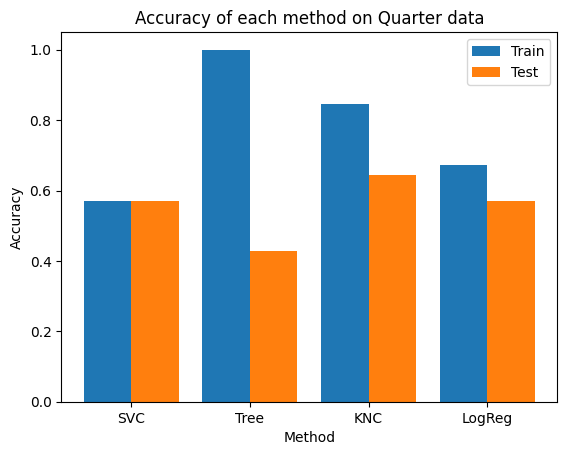

In [67]:
Model = ["SVC", "Tree", "KNC", "LogReg"]
quarter_test_acc = [svm_quarter_model.score(X_quarter_test, y_quarter_test),tree_quarter_model.score(X_quarter_test, y_quarter_test),knn_quarter_model.score(X_quarter_test, y_quarter_test),log_quarter_model.score(X_quarter_test, y_quarter_test)]
quarter_train_acc = [svm_quarter_model.score(X_quarter_test, y_quarter_test),tree_quarter_model.score(X_quarter_train, y_quarter_train),knn_quarter_model.score(X_quarter_train, y_quarter_train),log_quarter_model.score(X_quarter_train, y_quarter_train)]

Model_axis = np.arange(len(Model)) 

plt.bar(Model_axis - 0.2, quarter_train_acc, 0.4, label = 'Train') 
plt.bar(Model_axis + 0.2, quarter_test_acc, 0.4, label = 'Test') 

plt.xticks(Model_axis, Model) 
plt.xlabel("Method") 
plt.ylabel("Accuracy") 
plt.title("Accuracy of each method on Quarter data") 
plt.legend() 
plt.show() 

In [68]:
print("SVM Accuracy:", svm_season_model.score(X_season_test, y_season_test))
print("Decision Tree Accuracy:", tree_season_model.score(X_season_test, y_season_test))
print("KNN Accuracy:", knn_season_model.score(X_season_test, y_season_test))
print("Logistic Regression Accuracy:", log_season_model.score(X_season_test, y_season_test))

SVM Accuracy: 0.7857142857142857
Decision Tree Accuracy: 0.8571428571428571
KNN Accuracy: 0.5714285714285714
Logistic Regression Accuracy: 0.7857142857142857


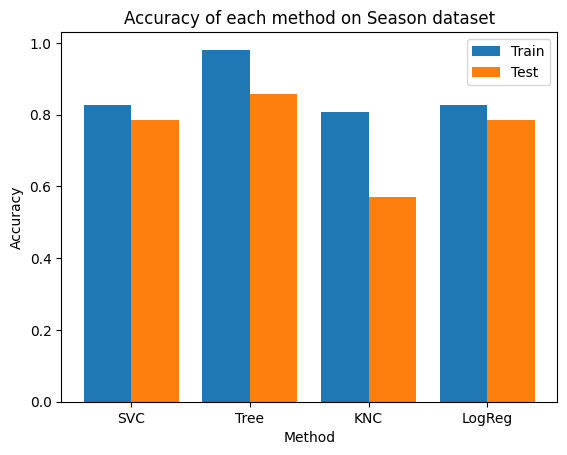

In [69]:
season_test_acc = [
    svm_season_model.score(X_season_test, y_season_test),
    tree_season_model.score(X_season_test, y_season_test),
    knn_season_model.score(X_season_test, y_season_test),
    log_season_model.score(X_season_test, y_season_test)]
season_train_acc = [
     svm_season_model.score(X_season_train, y_season_train),
    tree_season_model.score(X_season_train, y_season_train),
     knn_season_model.score(X_season_train, y_season_train),
     log_season_model.score(X_season_train, y_season_train)]
Model_axis = np.arange(len(Model)) 

plt.bar(Model_axis - 0.2, season_train_acc, 0.4, label = 'Train') 
plt.bar(Model_axis + 0.2, season_test_acc, 0.4, label = 'Test') 

plt.xticks(Model_axis, Model) 
plt.xlabel("Method") 
plt.ylabel("Accuracy") 
plt.title("Accuracy of each method on Season dataset") 
plt.legend() 
plt.show() 

<a id="Environment and Visitor"></a>
<h4><b><span style="color:#005f26">🔶 Step 4.3.2 | </span><span style="color:#ff6200">Environment and Tourism</span></b></h4>

In [70]:
X_env = pd.DataFrame(merged_data['total_reviews'])
Y_env = merged_data['waste_per_person']

# Kiểm tra kích thước dữ liệu
print(f"X shape: {X_env.shape}, Y shape: {Y_env.shape}")

X shape: (12, 1), Y shape: (12,)


Lượng data giữa năm 2022 và 2023 chỉ có tổng cộng 12 line of data, quá nhỏ để cho LSTM model có thể đưa ra phân tích.

In [71]:
merged_data[['year','hotelLocation','total_reviews','waste_per_person']]

year hotelLocation  total_reviews  waste_per_person
0   2022       Da_Nang           1397          0.403598
1   2022     Hai_Phong             48          0.299054
2   2022     Khanh_Hoa           1472          0.213525
3   2022    Kien_Giang            530          0.218913
4   2022    Quang_Ninh            175          0.329585
5   2022      Vung_Tau            501          0.306546
6   2023       Da_Nang           1150          0.425689
7   2023     Hai_Phong             37          0.310886
8   2023     Khanh_Hoa           1442          0.222370
9   2023    Kien_Giang            222          0.228297
10  2023    Quang_Ninh            276          0.343319
11  2023      Vung_Tau            620          0.322822

<a id="tree_env"></a>
<h5><b><span style="color:#005f26">🔶 Step 4.3.2.1 | </span><span style="color:#ff6200">Decision Tree</span></b></h5>

In [72]:
X_env_train, X_env_test, y_env_train, y_env_test = train_test_split(X_env, Y_env, test_size=0.3, random_state=42)

print(f"X_train shape: {X_env_train.shape}, X_test shape: {X_env_test.shape}")

X_train shape: (8, 1), X_test shape: (4, 1)


In [73]:
tree_env_model = DecisionTreeRegressor(random_state=42)
tree_env_model.fit(X_env_train, y_env_train)

y_env_pred_tree = tree_env_model.predict(X_env_test)

mse_env_tree = mean_squared_error(y_env_test, y_env_pred_tree)
r2_env_tree = r2_score(y_env_test, y_env_pred_tree)
print(f"Decision Tree - MSE: {mse_env_tree:.2f}, R2: {r2_env_tree:.2f}")


Decision Tree - MSE: 0.01, R2: -0.96


<a id="rand_for"></a>
<h5><b><span style="color:#005f26">🔶 Step 4.3.2.2 | </span><span style="color:#ff6200">Random Forest</span></b></h5>

In [74]:
forest_env_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_env_model.fit(X_env_train, y_env_train)

y_env_pred_forest = forest_env_model.predict(X_env_test)
mse_env_forest = mean_squared_error(y_env_test, y_env_pred_forest)
r2_env_forest = r2_score(y_env_test, y_env_pred_forest)
mae_env_forest = mean_absolute_error(y_env_test, y_env_pred_forest)

print(f"Random Forest - MSE: {mse_env_forest:.2f}, R2: {r2_env_forest:.2f}")

# predictions2 = forest_env_model.predict(X_env_test)
# print( 'RandomForest Accuracy: ')
# print(((predictions2)))
# print( '')

# from sklearn.metrics import accuracy_score

# print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_env_test, y_env_pred_forest)))

Random Forest - MSE: 0.01, R2: -0.19
